# **RBAC-ROUND 2-3N1F: DATA CLEANING, EXPLORATORY DATA ANALYSIS PROCESS**

# Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

# ORIGINAL DATASET: GIVEN BY ORGANIZER

## Demographic

In [ ]:
demo1 = pd.read_csv('demographic.csv')
demo1.head()

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE
0,2.0,2.0,20.0,18.0,9.0,74.0,NaN,60.0,1.0,6056000.0,1.0,0.0,1979.0,155.0,1.0,2.0,5.0
1,4.0,0.0,58.0,18.0,NaN,58.0,569518.0,NaN,2.0,19092000.0,0.0,0.0,1969.0,178.0,2.0,1.0,1.0
2,4.0,0.0,NaN,2.0,NaN,74.0,569723.0,65.0,1.0,1936000.0,2.0,3.0,1964.0,189.0,16.0,4.0,5.0
3,4.0,1.0,46.0,18.0,4.0,NaN,NaN,83.0,2.0,15413000.0,0.0,0.0,NaN,168.0,3.0,2.0,5.0
4,4.0,3.0,NaN,18.0,9.0,NaN,571556.0,74.0,1.0,17533000.0,2.0,NaN,1974.0,172.0,8.0,2.0,5.0


In [ ]:
# Change the columns name to lower case for easy usage later
demo1.columns = demo1.columns.str.lower()
demo1.columns

Index(['labour_contract_type', 'number_of_dependants',
       'permanent_address_province', 'industry', 'job',
       'company_address_province', 'contract_no', 'weight', 'education',
       'customer_income', 'creditibility', 'accommodation_type',
       'date_of_birth', 'height', 'working_in_year', 'marital_status',
       'income_resource'],
      dtype='object')

In [ ]:
demo1.columns.dtype

dtype('O')

In [ ]:
# Check data types
demo1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 17 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   labour_contract_type        293048 non-null  float64
 1   number_of_dependants        307877 non-null  float64
 2   permanent_address_province  315371 non-null  float64
 3   industry                    304094 non-null  float64
 4   job                         315548 non-null  float64
 5   company_address_province    262358 non-null  float64
 6   contract_no                 315507 non-null  float64
 7   weight                      315684 non-null  float64
 8   education                   308236 non-null  float64
 9   customer_income             315351 non-null  float64
 10  creditibility               315533 non-null  float64
 11  accommodation_type          307761 non-null  float64
 12  date_of_birth               315328 non-null  float64
 13  height        

In [ ]:
demo1.describe()
# Since many features in this dataset are Encoded, we only care about the number of these features: number_of_dependents(nearly 1: means average customer loans are personal), working_in_year(they are people who have worked)

,labour_contract_type,number_of_dependants,permanent_address_province,industry,job,company_address_province,contract_no,weight,education,customer_income,creditibility,accommodation_type,date_of_birth,height,working_in_year,marital_status,income_resource
count,293048.000000,307877.000000,315371.000000,304094.000000,315548.000000,262358.000000,315507.000000,315684.000000,308236.000000,3.153510e+05,315533.000000,307761.00000,315328.000000,315411.000000,301330.000000,307785.000000,308138.000000
mean,3.829055,0.711817,55.042372,14.267049,5.709683,54.669871,543395.169261,74.515107,1.888553,1.580194e+07,2.501123,1.17265,1988.130528,164.482139,5.681104,1.288978,3.522425
std,0.561187,0.950564,24.535809,6.337793,2.884552,23.468747,151571.488016,14.426580,1.803950,4.444601e+06,1.708439,1.30556,9.319373,14.432668,5.688048,1.008390,1.929613
min,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,314130.000000,50.000000,0.000000,1.000000e+03,0.000000,0.00000,1962.000000,140.000000,0.000000,0.000000,0.000000
25%,4.000000,0.000000,38.000000,8.000000,4.000000,38.000000,420477.500000,62.000000,1.000000,1.541300e+07,1.000000,0.00000,1982.000000,152.000000,2.000000,0.000000,1.000000
50%,4.000000,0.000000,51.000000,18.000000,6.000000,51.000000,517575.000000,74.000000,1.000000,1.753300e+07,3.000000,1.00000,1990.000000,164.000000,4.000000,2.000000,5.000000
75%,4.000000,1.000000,77.000000,18.000000,9.000000,75.000000,614846.500000,87.000000,2.000000,1.880800e+07,4.000000,3.00000,1996.000000,177.000000,8.000000,2.000000,5.000000
max,4.000000,30.000000,96.000000,23.000000,9.000000,96.000000,862727.000000,99.000000,6.000000,1.937100e+07,5.000000,4.00000,2004.000000,189.000000,43.000000,4.000000,5.000000


In [ ]:
# Check missing values
demo1.isnull().sum()

labour_contract_type           78152
number_of_dependants           63323
permanent_address_province     55829
industry                       67106
job                            55652
company_address_province      108842
contract_no                    55693
weight                         55516
education                      62964
customer_income                55849
creditibility                  55667
accommodation_type             63439
date_of_birth                  55872
height                         55789
working_in_year                69870
marital_status                 63415
income_resource                63062
dtype: int64

In [ ]:
null_pct = (demo1.isnull().sum())/len(demo1)
null_pct

labour_contract_type          0.210539
number_of_dependants          0.170590
permanent_address_province    0.150401
industry                      0.180781
job                           0.149925
company_address_province      0.293217
contract_no                   0.150035
weight                        0.149558
education                     0.169623
customer_income               0.150455
creditibility                 0.149965
accommodation_type            0.170902
date_of_birth                 0.150517
height                        0.150294
working_in_year               0.188227
marital_status                0.170838
income_resource               0.169887
dtype: float64

In [ ]:
# Calculate the percentage of rows with missing values
missing_percentage = demo1.isnull().any(axis=1).mean() * 100

print(f"Percentage of rows with missing values: {missing_percentage:.2f}%")

Percentage of rows with missing values: 94.92%


In [ ]:
demo1.duplicated().sum()

0

## Loan Origin

In [ ]:
loan1 = pd.read_csv('loan_origin.csv')
loan1.head()

,DISBURSEMENT_CHANNEL,LIQUIDITY,INSURANCE_COMPANY,INSURANCE_RATE,DISBURSEMENT_DATE,CONTRACT_NO,RATE,HAS_INSURANCE,PRODUCT_CATEGORY,LOAN_TERM,MONTH_INTEREST,LOAN_PURPOSE,BUSINESS_LINE,LOAN_AMOUNT
0,1.0,3.0,0.0,3.75,2023-09,571094.0,3.0,NaN,0.0,36.0,2.0,1.0,NaN,3450000.0
1,2.0,3.0,NaN,3.75,2023-09,569518.0,4.0,YES,1.0,NaN,2.6,3.0,0.0,3060000.0
2,1.0,1.0,0.0,3.75,2023-09,569723.0,NaN,NaN,0.0,NaN,1.7,3.0,0.0,1520000.0
3,1.0,4.0,1.0,3.75,2023-09,569501.0,0.0,YES,1.0,15.0,2.0,3.0,0.0,NaN
4,1.0,4.0,1.0,3.75,2023-09,NaN,2.0,NaN,0.0,NaN,1.7,3.0,0.0,3060000.0


In [ ]:
loan1.shape

(371200, 14)

In [ ]:
loan1.columns = loan1.columns.str.lower()
loan1.columns

Index(['disbursement_channel', 'liquidity', 'insurance_company',
       'insurance_rate', 'disbursement_date', 'contract_no', 'rate',
       'has_insurance', 'product_category', 'loan_term', 'month_interest',
       'loan_purpose', 'business_line', 'loan_amount'],
      dtype='object')

In [ ]:
loan1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371200 entries, 0 to 371199
Data columns (total 14 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   disbursement_channel  315211 non-null  float64
 1   liquidity             315574 non-null  float64
 2   insurance_company     315396 non-null  float64
 3   insurance_rate        315613 non-null  float64
 4   disbursement_date     315470 non-null  object 
 5   contract_no           315643 non-null  float64
 6   rate                  315635 non-null  float64
 7   has_insurance         315334 non-null  object 
 8   product_category      315447 non-null  float64
 9   loan_term             315169 non-null  float64
 10  month_interest        315292 non-null  float64
 11  loan_purpose          315973 non-null  float64
 12  business_line         315584 non-null  float64
 13  loan_amount           315681 non-null  float64
dtypes: float64(12), object(2)
memory usage: 39.6+ MB


In [ ]:
loan1.describe()

,disbursement_channel,liquidity,insurance_company,insurance_rate,contract_no,rate,product_category,loan_term,month_interest,loan_purpose,business_line,loan_amount
count,315211.000000,315574.000000,315396.000000,315613.000000,315643.000000,315635.000000,315447.000000,315169.000000,315292.000000,315973.000000,315584.000000,3.156810e+05
mean,1.215316,2.502979,0.504670,3.307745,543463.114842,2.500230,2.386287,24.850591,2.012365,3.591747,0.275683,2.536650e+06
std,0.498907,1.708361,0.499979,0.448038,151595.925933,1.708919,2.783625,8.826760,0.626082,1.577949,0.671491,1.598396e+06
min,0.000000,0.000000,0.000000,0.000000,314130.000000,0.000000,0.000000,3.000000,0.100000,0.000000,0.000000,1.000000e+04
25%,1.000000,1.000000,0.000000,3.000000,420559.500000,1.000000,1.000000,18.000000,1.600000,3.000000,0.000000,1.460000e+06
50%,1.000000,2.000000,1.000000,3.500000,517680.000000,3.000000,1.000000,24.000000,2.200000,3.000000,0.000000,2.520000e+06
75%,1.000000,4.000000,1.000000,3.750000,614872.500000,4.000000,3.000000,36.000000,2.500000,6.000000,0.000000,3.910000e+06
max,4.000000,5.000000,1.000000,3.750000,862727.000000,5.000000,18.000000,36.000000,3.200000,6.000000,2.000000,6.400000e+06


In [ ]:
loan1.isnull().sum()

disbursement_channel    55989
liquidity               55626
insurance_company       55804
insurance_rate          55587
disbursement_date       55730
contract_no             55557
rate                    55565
has_insurance           55866
product_category        55753
loan_term               56031
month_interest          55908
loan_purpose            55227
business_line           55616
loan_amount             55519
dtype: int64

In [ ]:
null_pct1 = (loan1.isnull().sum())/len(loan1)
null_pct1

# The percentage of Missing values in each column are high

disbursement_channel    0.150832
liquidity               0.149855
insurance_company       0.150334
insurance_rate          0.149749
disbursement_date       0.150135
contract_no             0.149669
rate                    0.149690
has_insurance           0.150501
product_category        0.150197
loan_term               0.150946
month_interest          0.150614
loan_purpose            0.148780
business_line           0.149828
loan_amount             0.149566
dtype: float64

In [ ]:
# Calculate the percentage of rows with missing values
missing_percentage1 = loan1.isnull().any(axis=1).mean() * 100
print(f"Percentage of rows with missing values: {missing_percentage1:.2f}%")
# This percentage is high and denotes that we can not drop the row with missing values

Percentage of rows with missing values: 89.79%


In [ ]:
loan1.duplicated().sum()
# There are 76 rows duplicated

76

In [ ]:
dup_pct = (loan1.duplicated().sum())/len(loan1)
dup_pct*100
# The percentage is just 0.02%, a very small portion. Therefore, we can drop it

0.020474137931034482

In [ ]:
loan1.drop_duplicates()

,disbursement_channel,liquidity,insurance_company,insurance_rate,disbursement_date,contract_no,rate,has_insurance,product_category,loan_term,month_interest,loan_purpose,business_line,loan_amount
0,1.0,3.0,0.0,3.75,2023-09,571094.0,3.0,NaN,0.0,36.0,2.0,1.0,NaN,3450000.0
1,2.0,3.0,NaN,3.75,2023-09,569518.0,4.0,YES,1.0,NaN,2.6,3.0,0.0,3060000.0
2,1.0,1.0,0.0,3.75,2023-09,569723.0,NaN,NaN,0.0,NaN,1.7,3.0,0.0,1520000.0
3,1.0,4.0,1.0,3.75,2023-09,569501.0,0.0,YES,1.0,15.0,2.0,3.0,0.0,NaN
4,1.0,4.0,1.0,3.75,2023-09,NaN,2.0,NaN,0.0,NaN,1.7,3.0,0.0,3060000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371195,1.0,1.0,1.0,3.75,2023-12,630947.0,5.0,YES,2.0,36.0,1.7,3.0,2.0,NaN
371196,1.0,4.0,0.0,3.75,2023-12,823371.0,3.0,YES,1.0,36.0,NaN,6.0,0.0,3060000.0
371197,1.0,NaN,0.0,3.75,2023-12,NaN,0.0,NaN,2.0,18.0,2.3,6.0,NaN,1520000.0
371198,1.0,0.0,1.0,NaN,2023-12,630638.0,NaN,YES,1.0,24.0,2.0,3.0,NaN,1520000.0


In [ ]:
# Check and print the data types of columns
for column, dtype in loan1.dtypes.items():
    if dtype == 'object':
        col_type = 'string'
    elif pd.api.types.is_numeric_dtype(dtype):
        col_type = 'number'
    elif pd.api.types.is_bool_dtype(dtype):
        col_type = 'boolean'
    else:
        col_type = 'other'

    print(f"Cột '{column}': {col_type}")


Cột 'disbursement_channel': number
Cột 'liquidity': number
Cột 'insurance_company': number
Cột 'insurance_rate': number
Cột 'disbursement_date': string
Cột 'contract_no': number
Cột 'rate': number
Cột 'has_insurance': string
Cột 'product_category': number
Cột 'loan_term': number
Cột 'month_interest': number
Cột 'loan_purpose': number
Cột 'business_line': number
Cột 'loan_amount': number


In [ ]:
loan1 = loan1.dropna(subset=['contract_no'])
# contract_no: Contracr Number is the Primary Key, so if the values in this feature are null, we drop it

# CLEAN DATA

## Data dictionary: Information of columns

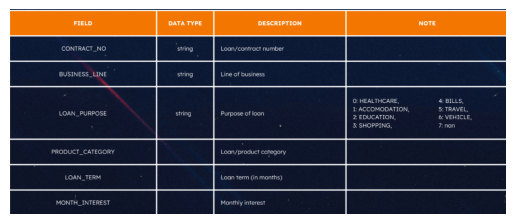

In [ ]:
import matplotlib.image as mpimg
img = mpimg.imread('C:/Users/admin/Downloads/Screenshot 2024-11-08 150010.png')
plt.imshow(img)
plt.axis('off')
plt.show()

* Contract_No: Can not be filled (Primary Key)
* Liquidity: need refilled
* Month Interest: Dựa vào Purpose, Creditability, loan amount
* Loan Purpose

In [ ]:
demo1.corr()

,labour_contract_type,number_of_dependants,permanent_address_province,industry,job,company_address_province,contract_no,weight,education,customer_income,creditibility,accommodation_type,date_of_birth,height,working_in_year,marital_status,income_resource
labour_contract_type,1.000000,0.106622,-0.106109,0.039344,-0.166182,-0.105778,0.059507,-0.001022,0.022126,0.271304,0.002401,-0.197879,-0.198942,-0.002501,0.221971,0.156119,-0.195290
number_of_dependants,0.106622,1.000000,-0.098583,0.017292,-0.034726,-0.094679,0.062407,-0.000795,-0.007790,0.169640,-0.000401,-0.244513,-0.247851,0.001352,0.175659,0.483020,-0.182099
permanent_address_province,-0.106109,-0.098583,1.000000,-0.004497,0.026311,0.893261,0.058779,-0.003261,0.030803,-0.055355,-0.002896,0.076941,-0.063472,-0.000851,0.056497,-0.047892,-0.053991
industry,0.039344,0.017292,-0.004497,1.000000,-0.085523,-0.004686,0.060359,-0.001884,0.024811,0.057114,0.000354,-0.015260,-0.006455,0.001423,0.002868,0.004056,-0.034063
job,-0.166182,-0.034726,0.026311,-0.085523,1.000000,0.019906,-0.135632,0.001162,-0.100131,-0.301526,-0.000399,0.092096,0.095826,0.001247,-0.067031,-0.034370,0.153800
company_address_province,-0.105778,-0.094679,0.893261,-0.004686,0.019906,1.000000,0.103728,-0.002672,0.029541,-0.051591,-0.002242,0.057885,-0.069384,0.001044,0.069940,-0.042354,-0.074139
contract_no,0.059507,0.062407,0.058779,0.060359,-0.135632,0.103728,1.000000,-0.002611,0.036920,0.119050,0.000376,-0.029903,-0.053325,-0.001570,0.070020,0.058400,-0.075623
weight,-0.001022,-0.000795,-0.003261,-0.001884,0.001162,-0.002672,-0.002611,1.000000,-0.001151,0.000065,0.001461,-0.000132,0.001138,0.001876,0.001089,0.000681,0.002380
education,0.022126,-0.007790,0.030803,0.024811,-0.100131,0.029541,0.036920,-0.001151,1.000000,0.073983,-0.002070,-0.002970,-0.063297,0.001509,0.054757,0.006662,0.016306
customer_income,0.271304,0.169640,-0.055355,0.057114,-0.301526,-0.051591,0.119050,0.000065,0.073983,1.000000,-0.000996,-0.216217,-0.299952,-0.001225,0.258775,0.220333,-0.425052


In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

categorical_columns = ['education', 'working_in_year', 'income_resource']
numerical_columns = ['customer_income', 'creditibility']

# Select only the columns to impute
data_to_impute = demo1[categorical_columns + numerical_columns]

# Initialize the Iterative Imputer
imputer = IterativeImputer(random_state=42)

# Apply MICE imputation to all columns with missing values
data_imputed = imputer.fit_transform(data_to_impute)

# Convert the imputed data back to a DataFrame for easier handling
data_imputed_df = pd.DataFrame(data_imputed, columns=categorical_columns + numerical_columns)

# Round categorical columns to the nearest integer to convert them back to categories
for col in categorical_columns:
    data_imputed_df[col] = np.round(data_imputed_df[col]).astype(int)

# Replace the original columns with the imputed data in the main DataFrame
demo1[categorical_columns + numerical_columns] = data_imputed_df

# Verify that there are no missing values in the selected columns
print(demo1[categorical_columns + numerical_columns].isna().sum())

education          0
working_in_year    0
income_resource    0
customer_income    0
creditibility      0
dtype: int64


In [ ]:
columns_to_fill_unknown = demo1.columns.difference(numerical_columns)
demo1[columns_to_fill_unknown] = demo1[columns_to_fill_unknown].fillna("Unknown")

# Verify that there are no missing values in the entire dataset
print(demo1.isna().sum())
print(demo1.head())

labour_contract_type          0
number_of_dependants          0
permanent_address_province    0
industry                      0
job                           0
company_address_province      0
contract_no                   0
weight                        0
education                     0
customer_income               0
creditibility                 0
accommodation_type            0
date_of_birth                 0
height                        0
working_in_year               0
marital_status                0
income_resource               0
dtype: int64
  labour_contract_type number_of_dependants permanent_address_province  \
0                  2.0                  2.0                       20.0   
1                  4.0                  0.0                       58.0   
2                  4.0                  0.0                    Unknown   
3                  4.0                  1.0                       46.0   
4                  4.0                  3.0                    Unknown   

## Distribution of Features

## Just to check whether the distribution of each feature change after Imputation Process

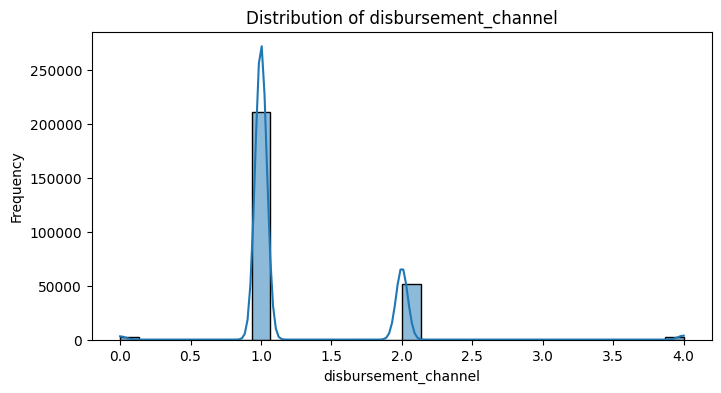

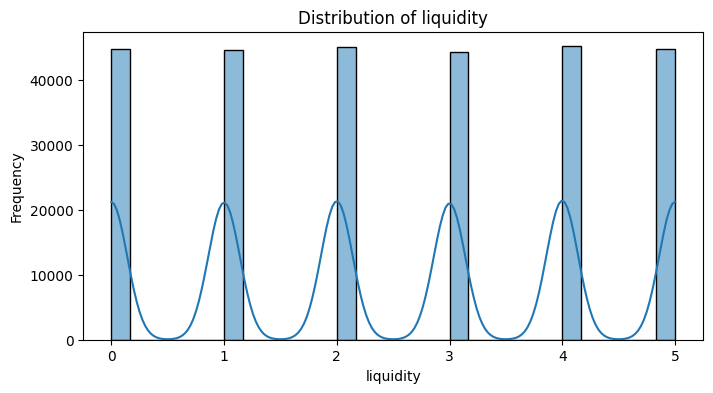

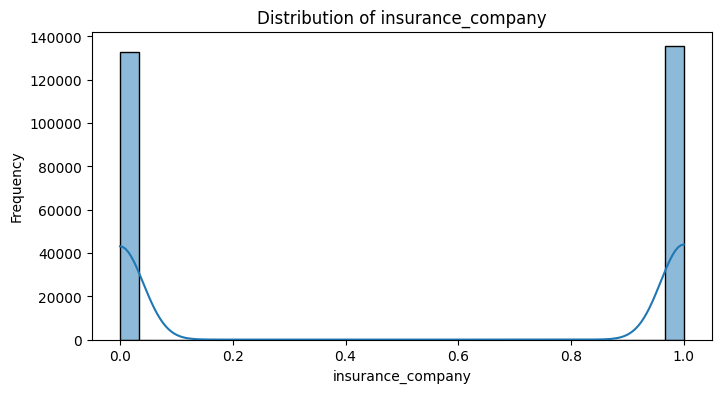

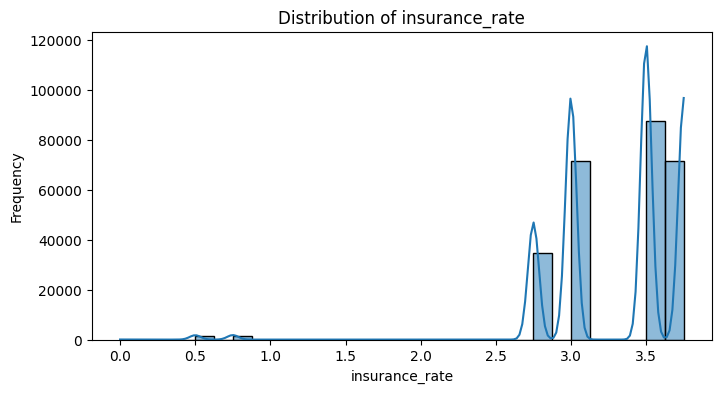

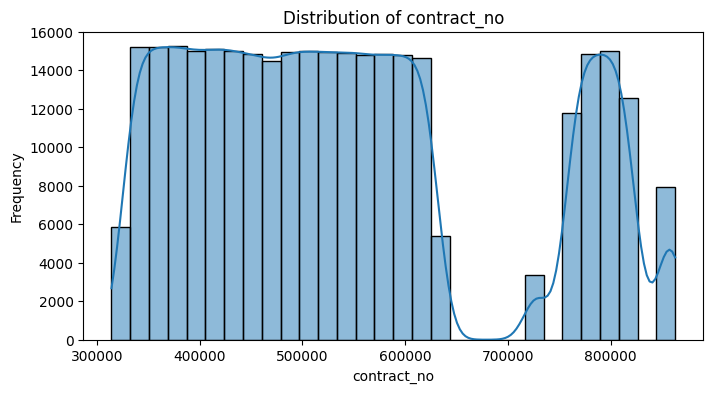

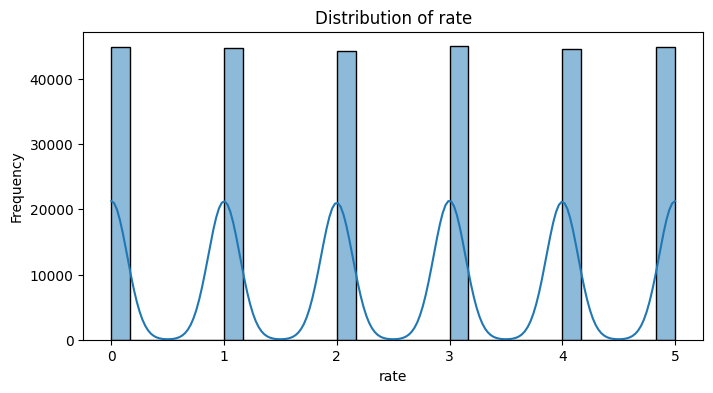

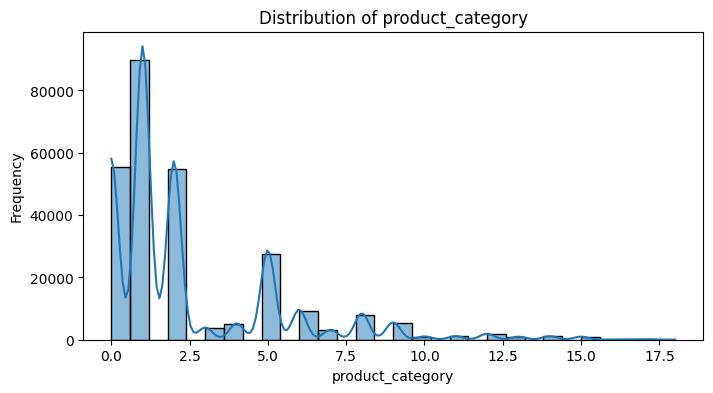

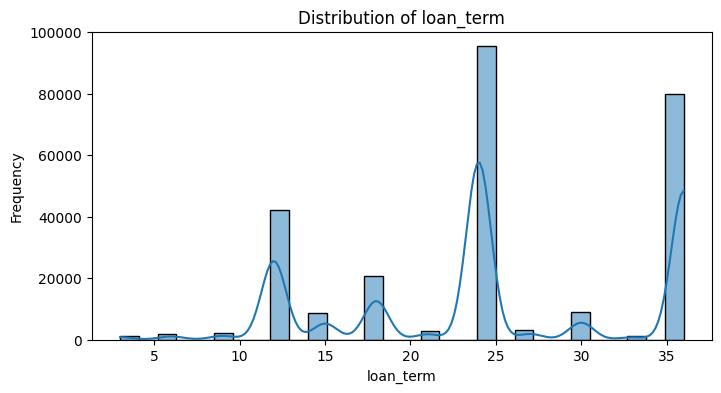

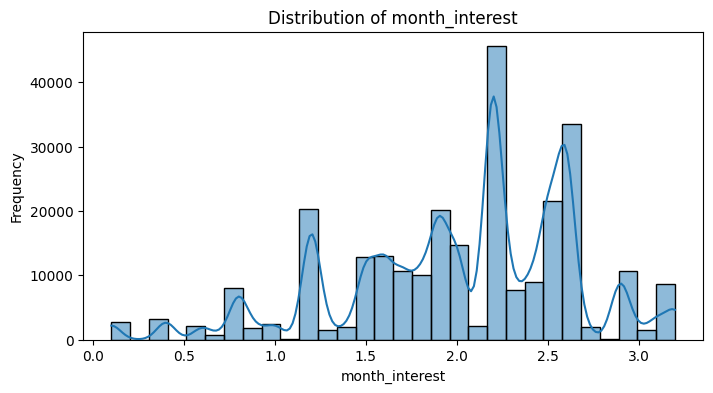

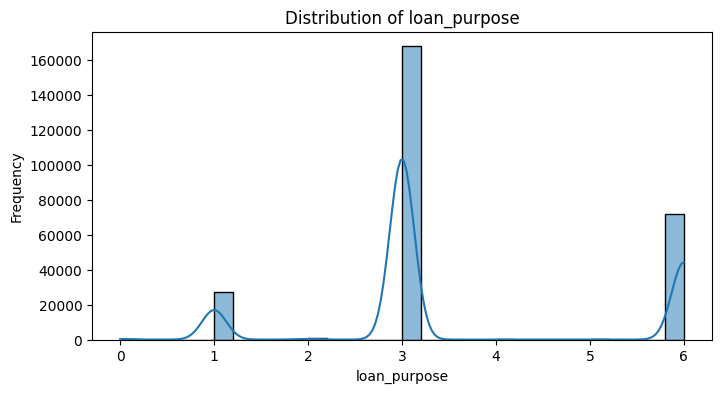

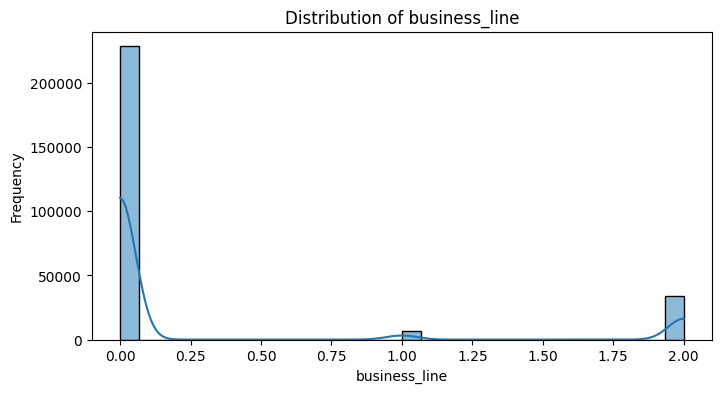

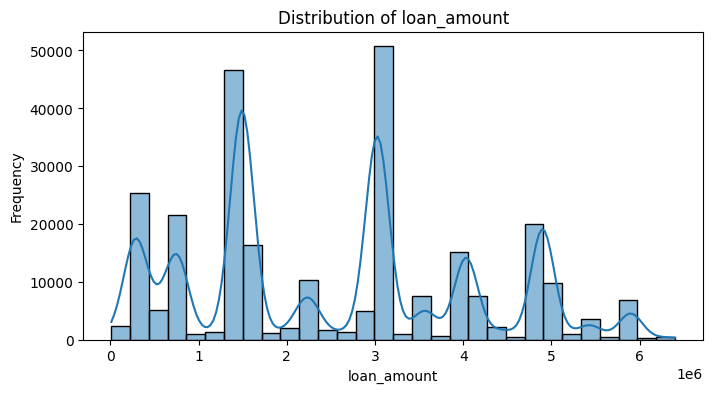

In [ ]:
# Loop through each numerical column and plot a histogram
for column in loan1.select_dtypes(include='number').columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(loan1[column], kde=True, bins=30)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


## Fill missing values: Assume that all features are separately independent. Only use Simple Techniques

The dataset has several columns with missing values. Here are some recommendations on how to handle them:

Categorical Columns (e.g., DISBURSEMENT_CHANNEL, HAS_INSURANCE, PRODUCT_CATEGORY, LOAN_PURPOSE, BUSINESS_LINE):

For columns like HAS_INSURANCE, we use the mode (most frequent value) to fill missing values.
For other categorical columns, consider the same approach or assigning a specific label, like "Unknown", if the column is string-based.
Numeric Columns (e.g., LOAN_AMOUNT, MONTH_INTEREST, RATE, LOAN_TERM, etc.):

For numeric columns, fill missing values using the mean or median, depending on the data distribution.
We also apply more advanced techniques, like interpolation, if the data has a natural order.
Date Columns (e.g., DISBURSEMENT_DATE):

We fill with the most common date or leave as NaN if the exact date is not critical.
Let’s implement the following steps:

Fill categorical columns with mode.
Fill numeric columns with the median.

In [ ]:
# Create a copy for different techniques
loan2 = loan1.copy()
loan2.head()

,disbursement_channel,liquidity,insurance_company,insurance_rate,disbursement_date,contract_no,rate,has_insurance,product_category,loan_term,month_interest,loan_purpose,business_line,loan_amount
0,1.0,3.0,0.0,3.75,2023-09,571094.0,3.0,NaN,0.0,36.0,2.0,1.0,NaN,3450000.0
1,2.0,3.0,NaN,3.75,2023-09,569518.0,4.0,YES,1.0,NaN,2.6,3.0,0.0,3060000.0
2,1.0,1.0,0.0,3.75,2023-09,569723.0,NaN,NaN,0.0,NaN,1.7,3.0,0.0,1520000.0
3,1.0,4.0,1.0,3.75,2023-09,569501.0,0.0,YES,1.0,15.0,2.0,3.0,0.0,NaN
5,1.0,1.0,0.0,3.75,2023-09,569818.0,NaN,YES,2.0,NaN,2.0,6.0,0.0,2910000.0


In [ ]:
# Fill categorical columns with the mode
categorical_cols = ['disbursement_channel', 'has_insurance', 'product_category', 'loan_purpose', 'business_line']
for col in categorical_cols:
    loan2[col].fillna(loan2[col].mode()[0], inplace=True)

# Fill numeric columns with the median
numeric_cols = ['liquidity', 'insurance_company', 'insurance_rate', 'rate',
                'loan_term', 'month_interest', 'loan_amount', 'contract_no']
for col in numeric_cols:
    loan2[col].fillna(loan2[col].median(), inplace=True)

# For DISBURSEMENT_DATE, we'll fill with the most common date
loan2['disbursement_date'].fillna(loan2['disbursement_date'].mode()[0], inplace=True)

# Check for remaining missing values
loan2.isnull().sum()


disbursement_channel    0
liquidity               0
insurance_company       0
insurance_rate          0
disbursement_date       0
contract_no             0
rate                    0
has_insurance           0
product_category        0
loan_term               0
month_interest          0
loan_purpose            0
business_line           0
loan_amount             0
dtype: int64

In [ ]:
loan2.head()

,disbursement_channel,liquidity,insurance_company,insurance_rate,disbursement_date,contract_no,rate,has_insurance,product_category,loan_term,month_interest,loan_purpose,business_line,loan_amount
0,1.0,3.0,0.0,3.75,2023-09,571094.0,3.0,YES,0.0,36.0,2.0,1.0,0.0,3450000.0
1,2.0,3.0,1.0,3.75,2023-09,569518.0,4.0,YES,1.0,24.0,2.6,3.0,0.0,3060000.0
2,1.0,1.0,0.0,3.75,2023-09,569723.0,3.0,YES,0.0,24.0,1.7,3.0,0.0,1520000.0
3,1.0,4.0,1.0,3.75,2023-09,569501.0,0.0,YES,1.0,15.0,2.0,3.0,0.0,2520000.0
5,1.0,1.0,0.0,3.75,2023-09,569818.0,3.0,YES,2.0,24.0,2.0,6.0,0.0,2910000.0


## Fill missing values: Assume that they have relationship. Use Multiple Iterative Imputer

### This is the chosen techniques for these 2 datasets

In [ ]:
loan3 = loan1.copy()
loan3.head()

,disbursement_channel,liquidity,insurance_company,insurance_rate,disbursement_date,contract_no,rate,has_insurance,product_category,loan_term,month_interest,loan_purpose,business_line,loan_amount
0,1.0,3.0,0.0,3.75,2023-09,571094.0,3.0,NaN,0.0,36.0,2.0,1.0,NaN,3450000.0
1,2.0,3.0,NaN,3.75,2023-09,569518.0,4.0,YES,1.0,NaN,2.6,3.0,0.0,3060000.0
2,1.0,1.0,0.0,3.75,2023-09,569723.0,NaN,NaN,0.0,NaN,1.7,3.0,0.0,1520000.0
3,1.0,4.0,1.0,3.75,2023-09,569501.0,0.0,YES,1.0,15.0,2.0,3.0,0.0,NaN
5,1.0,1.0,0.0,3.75,2023-09,569818.0,NaN,YES,2.0,NaN,2.0,6.0,0.0,2910000.0


In [ ]:
loan3.shape

(315643, 14)

In [ ]:
loan3.columns

Index(['disbursement_channel', 'liquidity', 'insurance_company',
       'insurance_rate', 'disbursement_date', 'contract_no', 'rate',
       'has_insurance', 'product_category', 'loan_term', 'month_interest',
       'loan_purpose', 'business_line', 'loan_amount'],
      dtype='object')

In [ ]:
# Calculate correlation matrix
loan_corr = loan3[['liquidity','insurance_rate','rate','loan_term','month_interest','loan_amount']]
correlation_matrix = loan_corr.corr()

# Display the correlation matrix
correlation_matrix

,liquidity,insurance_rate,rate,loan_term,month_interest,loan_amount
liquidity,1.000000,-0.000870,0.000062,-0.003517,0.000654,-0.004688
insurance_rate,-0.000870,1.000000,-0.001908,0.209002,0.266592,0.195869
rate,0.000062,-0.001908,1.000000,-0.001158,-0.005495,0.000832
loan_term,-0.003517,0.209002,-0.001158,1.000000,-0.076144,0.618355
month_interest,0.000654,0.266592,-0.005495,-0.076144,1.000000,-0.279362
loan_amount,-0.004688,0.195869,0.000832,0.618355,-0.279362,1.000000


Conclusion:
* Negative correlation: liquidity - loan_term & loan_amount, insurance_rate-rate, rate-loan_term, loan_term-month_interest, month_interest-loan_amount

Iterative Imputer
* IterativeImputer: This imputer uses a model-based approach to iteratively fill missing values in each column by treating it as a target and predicting based on other columns.
* This method should handle complex relationships between features and fill all missing values iteratively. After running this, all specified columns will be imputed without NaNs.

In [ ]:
# Define columns to impute
columns_to_impute = ['liquidity', 'insurance_rate', 'rate', 'loan_term', 'month_interest', 'loan_amount']

# Create the imputer
iterative_imputer = IterativeImputer(max_iter=10, random_state=0)

# Apply imputer on the selected columns
loan3[columns_to_impute] = iterative_imputer.fit_transform(loan3[columns_to_impute])

# Check for any remaining NaN values
loan3.isnull().sum()


disbursement_channel    47553
liquidity                   0
insurance_company       47396
insurance_rate              0
disbursement_date       47514
contract_no                 0
rate                        0
has_insurance           47628
product_category        47357
loan_term                   0
month_interest              0
loan_purpose            46874
business_line           47243
loan_amount                 0
dtype: int64

In [ ]:
columns_to_fill_unknown = loan3.columns.difference(columns_to_impute)
loan3[columns_to_fill_unknown] = loan3[columns_to_fill_unknown].fillna("Unknown")

# Verify that there are no missing values in the entire dataset
print(loan3.isna().sum())
print(loan3.head())

disbursement_channel    0
liquidity               0
insurance_company       0
insurance_rate          0
disbursement_date       0
contract_no             0
rate                    0
has_insurance           0
product_category        0
loan_term               0
month_interest          0
loan_purpose            0
business_line           0
loan_amount             0
dtype: int64
  disbursement_channel  liquidity insurance_company  insurance_rate  \
0                  1.0        3.0               0.0            3.75   
1                  2.0        3.0           Unknown            3.75   
2                  1.0        1.0               0.0            3.75   
3                  1.0        4.0               1.0            3.75   
5                  1.0        1.0               0.0            3.75   

  disbursement_date  contract_no      rate has_insurance product_category  \
0           2023-09     571094.0  3.000000       Unknown              0.0   
1           2023-09     569518.0  4.000000

# Join: demo1 and loan3

In [ ]:
# Ensure 'contract_no' is of the same type in both DataFrames
demo1['contract_no'] = demo1['contract_no'].astype(str)
loan3['contract_no'] = loan3['contract_no'].astype(str)

# Now perform the merge
merged_df = demo1.merge(loan3, on='contract_no', how='inner')  # Adjust the 'how' parameter as needed

In [ ]:
# Save merged_df to a CSV file
merged_df.to_csv('merged_data.csv', index=False)  # Set index=False to avoid saving the index as a separate column

## Manipulate Merged_df which is the combination of demographic and loan dataset

In [ ]:
merged_df.columns

Index(['labour_contract_type', 'number_of_dependants',
       'permanent_address_province', 'industry', 'job',
       'company_address_province', 'contract_no', 'weight', 'education',
       'customer_income', 'creditibility', 'accommodation_type',
       'date_of_birth', 'height', 'working_in_year', 'marital_status',
       'income_resource', 'disbursement_channel', 'liquidity',
       'insurance_company', 'insurance_rate', 'disbursement_date', 'rate',
       'has_insurance', 'product_category', 'loan_term', 'month_interest',
       'loan_purpose', 'business_line', 'loan_amount'],
      dtype='object')

In [ ]:
merged_df[['labour_contract_type', 'number_of_dependants',
       'permanent_address_province','industry','job',
       'company_address_province','weight', 'education','accommodation_type',
       'date_of_birth', 'height','marital_status','disbursement_channel','insurance_company','rate',
       'has_insurance', 'product_category','loan_purpose', 'business_line']]

,labour_contract_type,number_of_dependants,permanent_address_province,industry,job,company_address_province,weight,education,accommodation_type,date_of_birth,height,marital_status,disbursement_channel,insurance_company,rate,has_insurance,product_category,loan_purpose,business_line
0,4.0,0.0,58.0,18.0,Unknown,58.0,Unknown,2,0.0,1969.0,178.0,1.0,2.0,Unknown,4.000000,YES,1.0,3.0,0.0
1,4.0,0.0,Unknown,2.0,Unknown,74.0,65.0,1,3.0,1964.0,189.0,4.0,1.0,0.0,2.498223,Unknown,0.0,3.0,0.0
2,2.0,1.0,96.0,Unknown,0.0,75.0,85.0,1,Unknown,Unknown,161.0,Unknown,1.0,0.0,2.500293,YES,2.0,6.0,0.0
3,2.0,0.0,48.0,18.0,1.0,48.0,Unknown,1,0.0,1991.0,Unknown,0.0,1.0,Unknown,4.000000,Unknown,Unknown,3.0,0.0
4,Unknown,2.0,89.0,18.0,9.0,Unknown,69.0,1,Unknown,1991.0,159.0,2.0,1.0,0.0,5.000000,Unknown,Unknown,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268306,1.0,0.0,84.0,Unknown,4.0,79.0,66.0,1,4.0,Unknown,149.0,0.0,1.0,1.0,5.000000,YES,Unknown,6.0,2.0
268307,Unknown,0.0,91.0,Unknown,9.0,Unknown,54.0,3,3.0,1999.0,175.0,0.0,1.0,1.0,0.000000,YES,6.0,3.0,0.0
268308,4.0,3.0,75.0,18.0,Unknown,75.0,82.0,6,0.0,1976.0,156.0,2.0,1.0,1.0,5.000000,YES,2.0,3.0,2.0
268309,4.0,0.0,94.0,Unknown,1.0,Unknown,99.0,2,4.0,Unknown,175.0,0.0,1.0,0.0,3.000000,YES,1.0,6.0,0.0


## Fix columns not in Numerical Type

In [ ]:
columns_to_convert = [
    'labour_contract_type', 'number_of_dependants', 'permanent_address_province',
    'industry', 'job', 'company_address_province', 'weight', 'education',
    'accommodation_type', 'date_of_birth', 'height', 'marital_status',
    'disbursement_channel', 'insurance_company', 'rate', 'has_insurance',
    'product_category', 'loan_purpose', 'business_line'
]

# Convert columns to numeric where possible, otherwise set non-numeric values to NaN
for col in columns_to_convert:
    merged_df[col] = pd.to_numeric(merged_df[col], errors='coerce')

## Fix Data

In [ ]:
df=merged_df.copy()

In [ ]:
# Create new column 'loan_term_category' based on the condition of 'loan_term'
df['loan_term_category'] = df['loan_term'].apply(lambda x: 0 if x <= 12 else (1 if x <= 24 else 2))
df['loan_term_category'].unique()

array([2, 1, 0], dtype=int64)

In [ ]:
# Replace non-numeric values with NaN, then fill NaN with 7 and convert to int
df['loan_purpose'] = pd.to_numeric(df['loan_purpose'], errors='coerce')
df['loan_purpose'] = df['loan_purpose'].fillna(7).astype(int)

# Check unique values
df['loan_purpose'].unique()

array([3, 6, 7, 1, 2, 0, 5, 4])

In [ ]:
df['loan_purpose'] = df['loan_purpose'].astype(int)
df['loan_purpose'].unique()

array([3, 6, 7, 1, 2, 0, 5, 4])

In [ ]:
df['loan_type'] = df['loan_purpose'].astype(str) + df['loan_term_category'].astype(str)
df['loan_type'] = df['loan_type'].astype(object)
df['loan_type'].unique()

array(['32', '31', '62', '30', '61', '60', '71', '12', '72', '70', '11',
       '20', '10', '22', '00', '50', '40', '41', '52', '51', '21', '01',
       '42', '02'], dtype=object)

In [ ]:
df['dti_ratio'] = df['loan_amount'] / df['customer_income']

In [ ]:
df['loan_amount'] = df['loan_amount'].apply(lambda x: 'Unknown' if x < 10000 else x)

In [ ]:
df['creditibility'] = df['creditibility'].apply(np.ceil).astype(int)
df['creditibility'].unique()

array([0, 2, 1, 3, 4, 5])

In [ ]:
df['rate'] = df['rate'].apply(np.ceil).astype(np.float64)
df['rate'].unique()

array([4., 3., 5., 1., 2., 0.])

In [ ]:
df['month_interest'] = np.ceil(df['month_interest'] * 10) / 10
df = df[df['month_interest'] >= 0]
unique_values = df['month_interest'].unique()
print(unique_values)

[2.6 1.7 2.  3.1 2.3 2.1 1.3 2.2 3.2 2.9 0.6 2.4 2.7 0.4 1.8 2.5 1.5 1.4
 1.2 1.9 0.9 1.6 0.8 3.  0.7 1.  0.1 0.3 1.1 0.2 2.8 0.5]


In [ ]:
df['liquidity'] = df['liquidity'].apply(np.ceil).astype(int)
df['liquidity'].unique()

array([3, 1, 0, 4, 2, 5])

In [ ]:
df['loan_term'] = df['loan_term'].apply(lambda x: x + (3 - x % 3) if x % 3 != 0 else x)
# Kiểm tra các giá trị trong cột loan_term
df['loan_term'].unique()

array([30., 21., 27., 24., 12., 15., 33., 36., 18., 39.,  9.,  6.,  3.,
       42.])

In [ ]:
df['disbursement_date'] = df['disbursement_date'].replace(['unknown', 'Unknown'], pd.NA)

# Điền giá trị thiếu bằng phương pháp forward fill
df['disbursement_date'] = df['disbursement_date'].ffill()

# Chuyển đổi thành datetime, xử lý lỗi và suy luận định dạng
df['disbursement_date'] = pd.to_datetime(df['disbursement_date'], errors='coerce', infer_datetime_format=True)

# Hiển thị các giá trị duy nhất trong cột disbursement_date
df['disbursement_date'].unique()

C:\Users\admin\AppData\Local\Temp\ipykernel_12636\3656762461.py:7: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['disbursement_date'] = pd.to_datetime(df['disbursement_date'], errors='coerce', infer_datetime_format=True)


<DatetimeArray>
['2023-09-01 00:00:00', '2023-08-01 00:00:00', '2022-06-01 00:00:00',
 '2023-10-01 00:00:00', '2022-08-01 00:00:00', '2022-07-01 00:00:00',
 '2022-09-01 00:00:00', '2022-01-01 00:00:00', '2023-11-01 00:00:00',
 '2022-10-01 00:00:00', '2022-02-01 00:00:00', '2022-03-01 00:00:00',
 '2022-11-01 00:00:00', '2022-04-01 00:00:00', '2022-05-01 00:00:00',
 '2022-12-01 00:00:00', '2023-01-01 00:00:00', '2023-02-01 00:00:00',
 '2023-03-01 00:00:00', '2023-04-01 00:00:00', '2023-05-01 00:00:00',
 '2023-06-01 00:00:00', '2023-07-01 00:00:00', '2023-12-01 00:00:00']
Length: 24, dtype: datetime64[ns]

In [ ]:
df['loan_amount'] = df['loan_amount'].replace('unknown', np.nan)  # Thay 'unknown' bằng NaN
df['loan_amount'] = df['loan_amount'].fillna(0)  # Thay NaN bằng 0
df['loan_amount'] = pd.to_numeric(df['loan_amount'], errors='coerce').fillna(0).astype(int)

## Using K-Means for Customer Segmentation
* Clustering Risk: 0 is no risk and 1 is risk

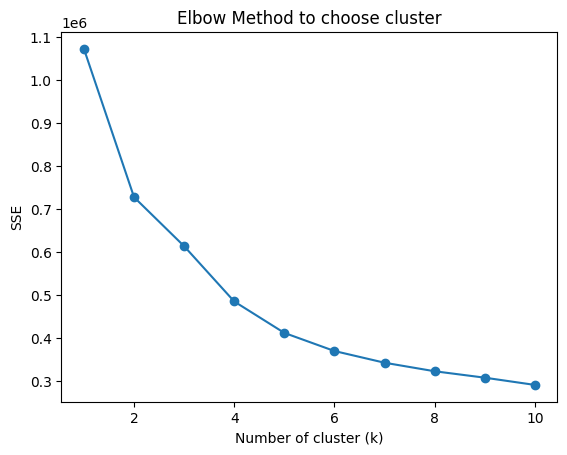

In [ ]:
# Modules needed
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Choose columns for clustering
features = df[['creditibility', 'customer_income', 'loan_term', 'loan_amount']]

# Standardize data
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Xác định số cụm bằng phương pháp Elbow Determine number of clusters by Elbow Mthod
sse = []
k_range = range(1, 11)
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    sse.append(kmeans.inertia_)

# Plot Elbow Graph
plt.plot(k_range, sse, marker='o')
plt.xlabel('Number of cluster (k)')
plt.ylabel('SSE')
plt.title('Elbow Method to choose cluster')
plt.show()

In [ ]:
kmeans = KMeans(n_clusters=2, random_state=42)
df['cluster'] = kmeans.fit_predict(features_scaled)

# THE BELOW CODE USED FOR QUESTION 1 AND QUESTION 3: WE USE IT FOR BUILDING CUSTOMER DEMOGRAPHIC, TYPES OF LOANS AND THEIR RELATIONSHIP

In [ ]:
data = pd.read_csv('final_merge.csv')
data.head()

,labour_contract_type,number_of_dependants,permanent_address_province,industry,job,company_address_province,contract_no,weight,education,customer_income,...,insurance_rate,disbursement_date,rate,has_insurance,product_category,loan_term,month_interest,loan_purpose,business_line,loan_amount
0,4.0,0.0,58.0,18.0,NaN,58.0,569518.0,NaN,2,19092000.0,...,3.75,2023-09-01,4.0,NaN,1.0,30.0,2.6,3.0,0.0,3060000.0
1,4.0,0.0,NaN,2.0,NaN,74.0,569723.0,65.0,1,1936000.0,...,3.75,2023-09-01,3.0,NaN,0.0,21.0,1.7,3.0,0.0,1520000.0
2,2.0,1.0,96.0,NaN,0.0,75.0,569818.0,85.0,1,17533000.0,...,3.75,2023-09-01,3.0,NaN,2.0,27.0,2.0,6.0,0.0,2910000.0
3,2.0,0.0,48.0,18.0,1.0,48.0,569794.0,NaN,1,17018000.0,...,3.75,2023-09-01,4.0,NaN,NaN,24.0,1.7,3.0,0.0,2250000.0
4,NaN,2.0,89.0,18.0,9.0,NaN,810070.0,69.0,1,7025000.0,...,3.75,2023-09-01,5.0,NaN,NaN,12.0,2.0,3.0,0.0,1419823.3957967963


In [ ]:
data.columns

Index(['labour_contract_type', 'number_of_dependants',
       'permanent_address_province', 'industry', 'job',
       'company_address_province', 'contract_no', 'weight', 'education',
       'customer_income', 'creditibility', 'accommodation_type',
       'date_of_birth', 'height', 'working_in_year', 'marital_status',
       'income_resource', 'disbursement_channel', 'liquidity',
       'insurance_company', 'insurance_rate', 'disbursement_date', 'rate',
       'has_insurance', 'product_category', 'loan_term', 'month_interest',
       'loan_purpose', 'business_line', 'loan_amount'],
      dtype='object')

In [ ]:
data1 = pd.read_csv('demo_final.csv')
data1.head()

,LABOUR_CONTRACT_TYPE,NUMBER_OF_DEPENDANTS,PERMANENT_ADDRESS_PROVINCE,INDUSTRY,JOB,COMPANY_ADDRESS_PROVINCE,CONTRACT_NO,WEIGHT,EDUCATION,CUSTOMER_INCOME,CREDITIBILITY,ACCOMMODATION_TYPE,DATE_OF_BIRTH,HEIGHT,WORKING_IN_YEAR,MARITAL_STATUS,INCOME_RESOURCE
0,2.0,2.0,20.0,18.0,9.0,74.0,NaN,60.0,1,6056000.0,1,0.0,1979.0,155.0,1,2.0,5
1,4.0,0.0,58.0,18.0,NaN,58.0,569518.0,NaN,2,19092000.0,0,0.0,1969.0,178.0,2,1.0,1
2,4.0,0.0,NaN,2.0,NaN,74.0,569723.0,65.0,1,1936000.0,2,3.0,1964.0,189.0,16,4.0,5
3,4.0,1.0,46.0,18.0,4.0,NaN,NaN,83.0,2,15413000.0,0,0.0,NaN,168.0,3,2.0,5
4,4.0,3.0,NaN,18.0,9.0,NaN,571556.0,74.0,1,17533000.0,2,NaN,1974.0,172.0,8,2.0,5


In [ ]:
data1.columns = data1.columns.str.lower()
data1.columns

Index(['labour_contract_type', 'number_of_dependants',
       'permanent_address_province', 'industry', 'job',
       'company_address_province', 'contract_no', 'weight', 'education',
       'customer_income', 'creditibility', 'accommodation_type',
       'date_of_birth', 'height', 'working_in_year', 'marital_status',
       'income_resource'],
      dtype='object')

In [ ]:
data1.head()

,labour_contract_type,number_of_dependants,permanent_address_province,industry,job,company_address_province,contract_no,weight,education,customer_income,creditibility,accommodation_type,date_of_birth,height,working_in_year,marital_status,income_resource
0,2.0,2.0,20.0,18.0,9.0,74.0,NaN,60.0,1,6056000.0,1,0.0,1979.0,155.0,1,2.0,5
1,4.0,0.0,58.0,18.0,NaN,58.0,569518.0,NaN,2,19092000.0,0,0.0,1969.0,178.0,2,1.0,1
2,4.0,0.0,NaN,2.0,NaN,74.0,569723.0,65.0,1,1936000.0,2,3.0,1964.0,189.0,16,4.0,5
3,4.0,1.0,46.0,18.0,4.0,NaN,NaN,83.0,2,15413000.0,0,0.0,NaN,168.0,3,2.0,5
4,4.0,3.0,NaN,18.0,9.0,NaN,571556.0,74.0,1,17533000.0,2,NaN,1974.0,172.0,8,2.0,5


## Customer profile: Age(25-50), Education Level (1,2), Income(15-20M)

In [ ]:
# Calculate age
data1['age'] = 2024 - data1['date_of_birth']
data1['age'].unique()

array([45., 55., 60., nan, 50., 33., 42., 29., 28., 25., 44., 61., 46.,
       37., 58., 52., 43., 54., 31., 38., 40., 23., 57., 32., 41., 36.,
       34., 48., 27., 47., 53., 24., 59., 30., 26., 39., 21., 22., 35.,
       56., 49., 51., 62., 20.])

In [ ]:
filtered_data = data1[
    (data1['age'] >= 25) & (data1['age'] <= 50) &
    (data1['education'].isin([1, 2])) &
    (data1['customer_income'] >= 15_000_000) & (data1['customer_income'] <= 20_000_000) &
    (data1['number_of_dependants']==0) &
    (data1['creditibility']==3)
]

filtered_data

,labour_contract_type,number_of_dependants,permanent_address_province,industry,job,company_address_province,contract_no,weight,education,customer_income,creditibility,accommodation_type,date_of_birth,height,working_in_year,marital_status,income_resource,age
6,2.0,0.0,48.0,18.0,1.0,48.0,569794.0,NaN,1,17018000.0,3,0.0,1991.0,NaN,1,0.0,5,33.0
53,NaN,0.0,86.0,6.0,6.0,86.0,570783.0,98.0,1,18808000.0,3,0.0,1979.0,166.0,7,2.0,1,45.0
135,4.0,0.0,54.0,18.0,6.0,54.0,570204.0,NaN,1,18808000.0,3,0.0,1976.0,173.0,22,0.0,1,48.0
148,4.0,0.0,60.0,18.0,6.0,60.0,382841.0,95.0,2,19092000.0,3,1.0,1998.0,177.0,5,0.0,1,26.0
174,4.0,0.0,74.0,18.0,9.0,74.0,383132.0,68.0,1,17533000.0,3,1.0,1999.0,188.0,5,0.0,5,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
371073,4.0,0.0,56.0,18.0,9.0,56.0,NaN,75.0,2,18522000.0,3,0.0,1993.0,170.0,11,0.0,5,31.0
371105,3.0,0.0,84.0,7.0,1.0,84.0,823274.0,77.0,1,19183000.0,3,0.0,1982.0,185.0,2,3.0,3,42.0
371136,4.0,0.0,48.0,18.0,NaN,48.0,630855.0,56.0,1,16355000.0,3,0.0,1994.0,182.0,4,2.0,5,30.0
371140,4.0,0.0,62.0,NaN,6.0,62.0,630990.0,NaN,1,18808000.0,3,NaN,1998.0,186.0,1,0.0,5,26.0


In [ ]:
merged_data = data.merge(filtered_data, on='contract_no', suffixes=('_data', '_filtered'))
merged_data

,labour_contract_type_data,number_of_dependants_data,permanent_address_province_data,industry_data,job_data,company_address_province_data,contract_no,weight_data,education_data,customer_income_data,...,education_filtered,customer_income_filtered,creditibility_filtered,accommodation_type_filtered,date_of_birth_filtered,height_filtered,working_in_year_filtered,marital_status_filtered,income_resource_filtered,age
0,2.0,0.0,48.0,18.0,1.0,48.0,569794.0,NaN,1,17018000.0,...,1,17018000.0,3,0.0,1991.0,NaN,1,0.0,5,33.0
1,NaN,0.0,86.0,6.0,6.0,86.0,570783.0,98.0,1,18808000.0,...,1,18808000.0,3,0.0,1979.0,166.0,7,2.0,1,45.0
2,4.0,0.0,54.0,18.0,6.0,54.0,570204.0,NaN,1,18808000.0,...,1,18808000.0,3,0.0,1976.0,173.0,22,0.0,1,48.0
3,4.0,0.0,60.0,18.0,6.0,60.0,382841.0,95.0,2,19092000.0,...,2,19092000.0,3,1.0,1998.0,177.0,5,0.0,1,26.0
4,4.0,0.0,74.0,18.0,9.0,74.0,383132.0,68.0,1,17533000.0,...,1,17533000.0,3,1.0,1999.0,188.0,5,0.0,5,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,4.0,0.0,86.0,18.0,4.0,79.0,450345.0,75.0,1,17533000.0,...,1,17533000.0,3,3.0,1999.0,151.0,1,0.0,5,25.0
9048,4.0,0.0,NaN,18.0,6.0,48.0,488482.0,90.0,1,19092000.0,...,1,19092000.0,3,3.0,1997.0,163.0,3,2.0,1,27.0
9049,NaN,0.0,87.0,NaN,9.0,92.0,450756.0,NaN,1,17018000.0,...,1,17018000.0,3,3.0,1986.0,189.0,3,1.0,5,38.0
9050,4.0,0.0,22.0,18.0,4.0,NaN,488472.0,68.0,2,18288000.0,...,2,18288000.0,3,1.0,1992.0,171.0,1,NaN,5,32.0


In [ ]:
merged_data.columns

Index(['labour_contract_type_data', 'number_of_dependants_data',
       'permanent_address_province_data', 'industry_data', 'job_data',
       'company_address_province_data', 'contract_no', 'weight_data',
       'education_data', 'customer_income_data', 'creditibility_data',
       'accommodation_type_data', 'date_of_birth_data', 'height_data',
       'working_in_year_data', 'marital_status_data', 'income_resource_data',
       'disbursement_channel', 'liquidity', 'insurance_company',
       'insurance_rate', 'disbursement_date', 'rate', 'has_insurance',
       'product_category', 'loan_term', 'month_interest', 'loan_purpose',
       'business_line', 'loan_amount', 'labour_contract_type_filtered',
       'number_of_dependants_filtered', 'permanent_address_province_filtered',
       'industry_filtered', 'job_filtered',
       'company_address_province_filtered', 'weight_filtered',
       'education_filtered', 'customer_income_filtered',
       'creditibility_filtered', 'accommodation_t

In [ ]:
merged_data = merged_data.loc[:, ~merged_data.columns.str.endswith('_filtered')]
merged_data

,labour_contract_type_data,number_of_dependants_data,permanent_address_province_data,industry_data,job_data,company_address_province_data,contract_no,weight_data,education_data,customer_income_data,...,disbursement_date,rate,has_insurance,product_category,loan_term,month_interest,loan_purpose,business_line,loan_amount,age
0,2.0,0.0,48.0,18.0,1.0,48.0,569794.0,NaN,1,17018000.0,...,2023-09-01,4.0,NaN,NaN,24.0,1.7,3.0,0.0,2250000.0,33.0
1,NaN,0.0,86.0,6.0,6.0,86.0,570783.0,98.0,1,18808000.0,...,2023-09-01,4.0,NaN,2.0,24.0,2.6,6.0,0.0,4910000.0,45.0
2,4.0,0.0,54.0,18.0,6.0,54.0,570204.0,NaN,1,18808000.0,...,2023-09-01,5.0,NaN,1.0,36.0,2.1,6.0,0.0,4060000.0,48.0
3,4.0,0.0,60.0,18.0,6.0,60.0,382841.0,95.0,2,19092000.0,...,2023-10-01,3.0,NaN,NaN,36.0,2.2,3.0,0.0,3420000.0,26.0
4,4.0,0.0,74.0,18.0,9.0,74.0,383132.0,68.0,1,17533000.0,...,2022-06-01,0.0,NaN,1.0,36.0,2.0,6.0,0.0,4890000.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9047,4.0,0.0,86.0,18.0,4.0,79.0,450345.0,75.0,1,17533000.0,...,2022-11-01,3.0,NaN,1.0,36.0,2.0,3.0,0.0,3930692.6435580654,25.0
9048,4.0,0.0,NaN,18.0,6.0,48.0,488482.0,90.0,1,19092000.0,...,2023-03-01,3.0,NaN,2.0,18.0,1.9,6.0,0.0,4900000.0,27.0
9049,NaN,0.0,87.0,NaN,9.0,92.0,450756.0,NaN,1,17018000.0,...,2022-11-01,4.0,NaN,1.0,36.0,2.6,3.0,0.0,3030000.0,38.0
9050,4.0,0.0,22.0,18.0,4.0,NaN,488472.0,68.0,2,18288000.0,...,2023-03-01,3.0,NaN,2.0,24.0,1.9,3.0,NaN,1500000.0,32.0


In [ ]:
merged_data.columns = ['labour_contract', 'number_of_dependants',
       'permanent_address_province', 'industry', 'job',
       'company_address_province', 'contract_no', 'weight',
       'education', 'customer_income', 'creditibility',
       'accommodation_type', 'date_of_birth', 'height',
       'working_in_year', 'marital_status', 'income_resource',
       'disbursement_channel', 'liquidity', 'insurance_company',
       'insurance_rate', 'disbursement_date', 'rate', 'has_insurance',
       'product_category', 'loan_term', 'month_interest', 'loan_purpose',
       'business_line', 'loan_amount', 'age']

## Types of loans

                      age  customer_income  loan_amount  month_interest
age              1.000000         0.250434     0.195608       -0.067866
customer_income  0.250434         1.000000     0.346376       -0.144702
loan_amount      0.195608         0.346376     1.000000       -0.340610
month_interest  -0.067866        -0.144702    -0.340610        1.000000


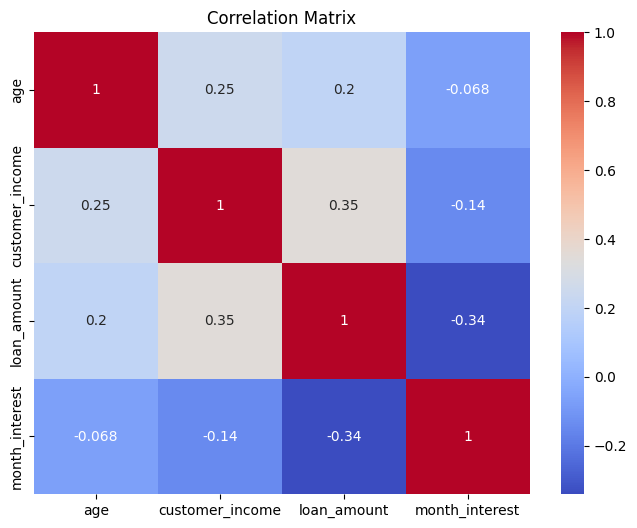

In [ ]:
# Select relevant numerical columns
numeric_cols = merged_data[['age','customer_income','loan_amount','month_interest']]

# Calculate correlation matrix
correlation_matrix = numeric_cols.corr()
print(correlation_matrix)

# Plot heatmap for better visualization
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

### By Education Level

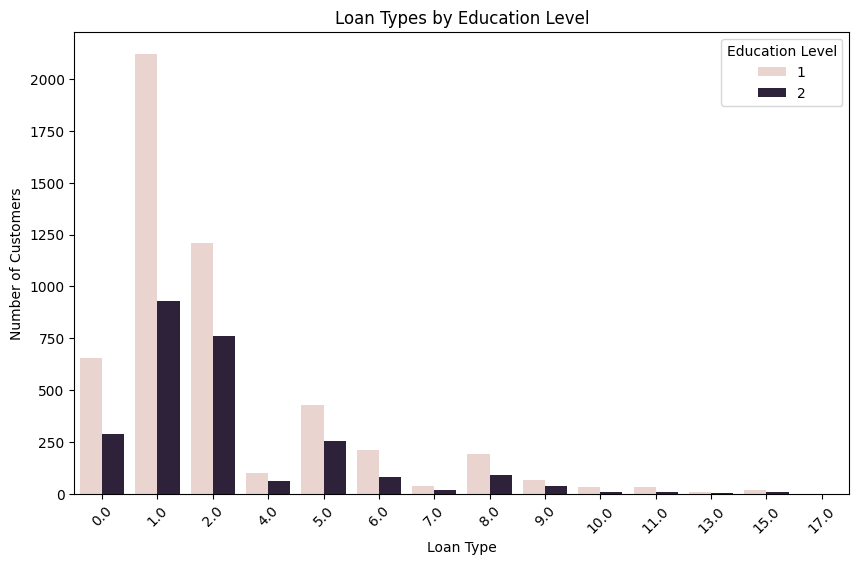

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=merged_data, x='product_category', hue='education')
plt.title('Loan Types by Education Level')
plt.xlabel('Loan Type')
plt.ylabel('Number of Customers')
plt.legend(title='Education Level')
plt.xticks(rotation=45)
plt.show()

### By Term: Short term, Medium term, Long term

In [ ]:
# The term in dataset displayed by months
merged_data['loan_type_by_term'] = merged_data['loan_term'].apply(
    lambda x: 'Short-term' if pd.notnull(x) and x < 12 else
              'Medium-term' if pd.notnull(x) and x <= 24 else
              'Long-term' if pd.notnull(x) else
              'Unknown'
)

C:\Users\admin\AppData\Local\Temp\ipykernel_12636\1665817451.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['loan_type_by_term'] = merged_data['loan_term'].apply(


In [ ]:
# Convert loan_term to numeric, invalid parsing will be set as NaN
merged_data['loan_term'] = pd.to_numeric(merged_data['loan_term'], errors='coerce')
merged_data['loan_amount'] = pd.to_numeric(merged_data['loan_amount'], errors='coerce')

# Reapply the classification
merged_data['loan_type_by_term'] = merged_data['loan_term'].apply(
    lambda x: 'Short-term' if x < 12 else 'Medium-term' if x <= 24 else 'Long-term'
)

C:\Users\admin\AppData\Local\Temp\ipykernel_12636\2028371325.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['loan_term'] = pd.to_numeric(merged_data['loan_term'], errors='coerce')
C:\Users\admin\AppData\Local\Temp\ipykernel_12636\2028371325.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['loan_amount'] = pd.to_numeric(merged_data['loan_amount'], errors='coerce')
C:\Users\admin\AppData\Local\Temp\ipykernel_12636\2028371325.py:6: SettingWithCopyWarning: 
A value is trying to b

C:\Users\admin\AppData\Local\Temp\ipykernel_12636\3134753124.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=merged_data, x='loan_type_by_term', palette='viridis')


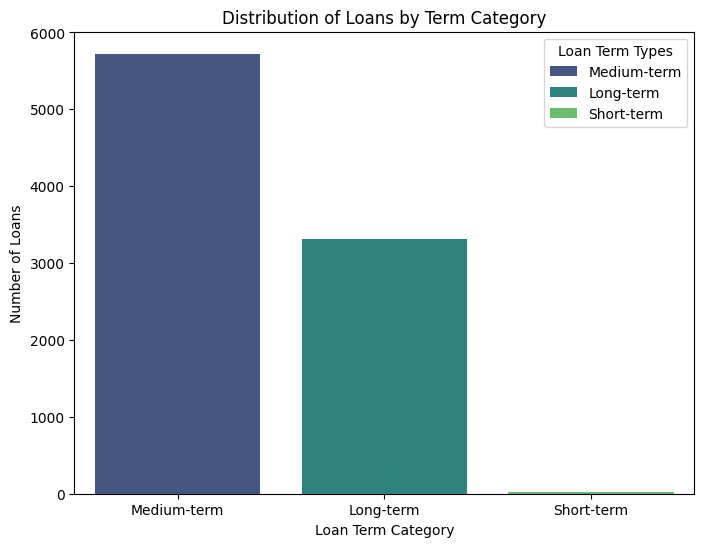

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=merged_data, x='loan_type_by_term', palette='viridis')
plt.title('Distribution of Loans by Term Category')
plt.xlabel('Loan Term Category')
plt.ylabel('Number of Loans')
legend_labels = ['Medium-term', 'Long-term', 'Short-term']
plt.legend(legend_labels, title="Loan Term Types", loc='upper right')
plt.show()

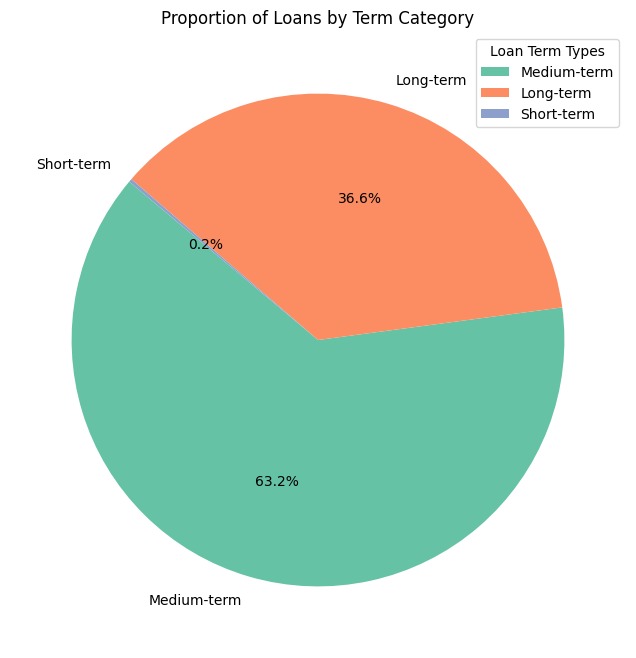

In [ ]:
# Calculate the distribution of loan terms
loan_term_counts = merged_data['loan_type_by_term'].value_counts()

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(loan_term_counts, labels=loan_term_counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62', '#8da0cb'])
plt.title('Proportion of Loans by Term Category')
legend_labels = ['Medium-term', 'Long-term', 'Short-term']
plt.legend(legend_labels, title="Loan Term Types", loc='upper right')
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_12636\1757326485.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=merged_data, x='loan_type_by_term', y='loan_amount', palette='viridis')


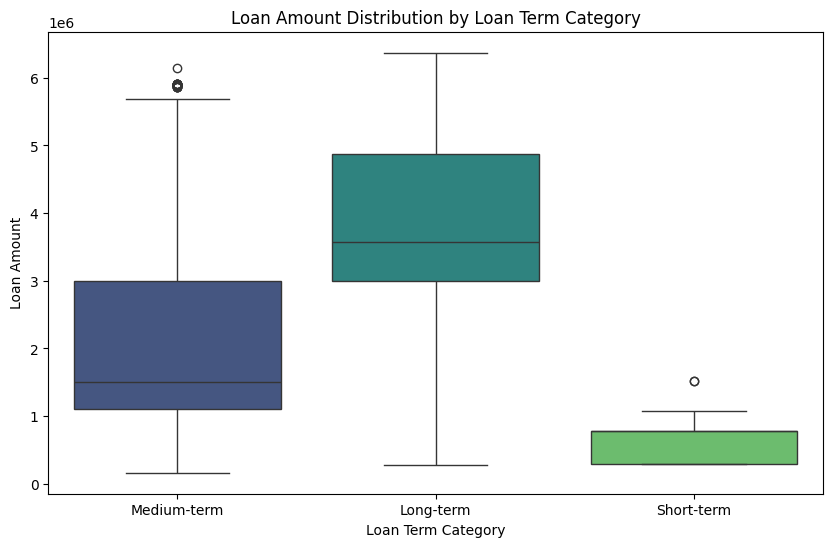

In [ ]:
# Box plot to show loan amount distribution by loan term category
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_data, x='loan_type_by_term', y='loan_amount', palette='viridis')
plt.title('Loan Amount Distribution by Loan Term Category')
plt.xlabel('Loan Term Category')
plt.ylabel('Loan Amount')
plt.show()

### By Loan Amount:
* Small: Equal or Less than 100 Million
* Medium: Equal or Less than 500 Million
* Large: Above 500 Million

In [ ]:
merged_data['loan_type_by_amount'] = merged_data['loan_amount'].apply(
    lambda x: 'Small loan' if x <= 100_000_000 else 'Medium loan' if x <= 500_000_000 else 'Large loan'
)

C:\Users\admin\AppData\Local\Temp\ipykernel_12636\2397094889.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['loan_type_by_amount'] = merged_data['loan_amount'].apply(


### By Interest Rate
* Low: Less than 1
* Standard: From 1 to 2.5
* High: Above 2.5
Because the Maximum rate is 3.6

In [ ]:
merged_data['interest_type'] = merged_data['rate'].apply(
    lambda x: 'Low-interest' if x < 1 else 'Standard-interest' if x <= 2.5 else 'High-interest'
)

C:\Users\admin\AppData\Local\Temp\ipykernel_12636\1969639513.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  merged_data['interest_type'] = merged_data['rate'].apply(


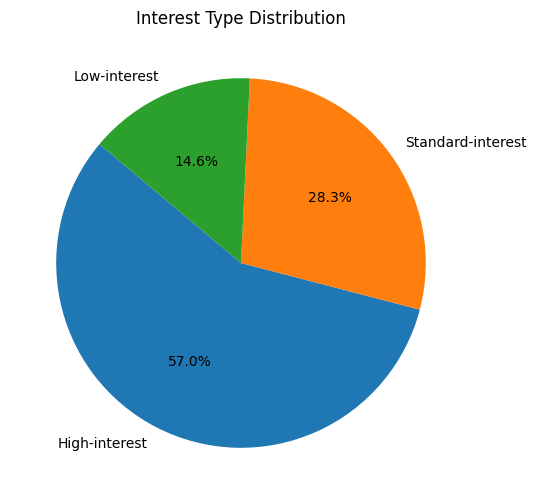

In [ ]:
# Count occurrences for each category
category_counts = merged_data['interest_type'].value_counts()

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Interest Type Distribution')
plt.show()